In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')




In [2]:
df=pd.read_csv('Airlines[1].csv',encoding='utf-8',encoding_errors='replace')

In [3]:
df.head()


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [4]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [6]:
df.drop(['AirportFrom'],axis=1,inplace=True)

In [7]:
df.drop(['AirportTo'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

id           0
Airline      0
Flight       0
DayOfWeek    0
Time         0
Length       0
Delay        0
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

id           0.0
Airline      0.0
Flight       0.0
DayOfWeek    0.0
Time         0.0
Length       0.0
Delay        0.0
dtype: float64

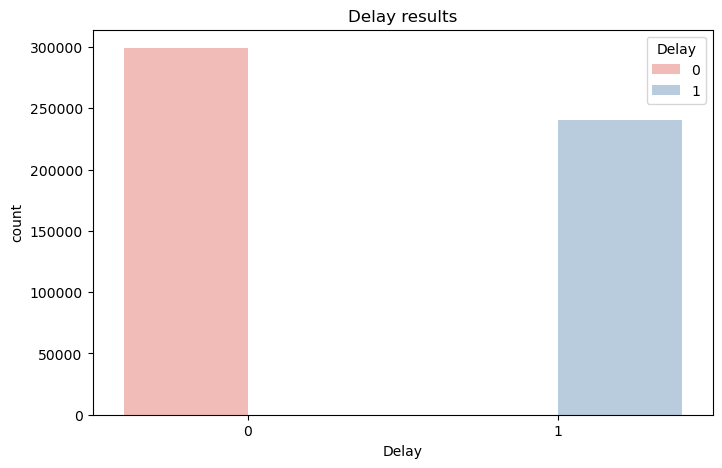

In [10]:
plt.figure(figsize = (8,5))
sns.countplot(x ="Delay", data = df, hue ="Delay", palette ="Pastel1")
plt.title("Delay results")
plt.show()

In [11]:
features=df.iloc[:,0:-1]
target=df.iloc[:,-1]

In [12]:
features.head()

,id,Airline,Flight,DayOfWeek,Time,Length
0,1,CO,269,3,15,205
1,2,US,1558,3,15,222
2,3,AA,2400,3,20,165
3,4,AA,2466,3,20,195
4,5,AS,108,3,30,202


In [13]:
target.head()

0    1
1    1
2    1
3    1
4    0
Name: Delay, dtype: int64

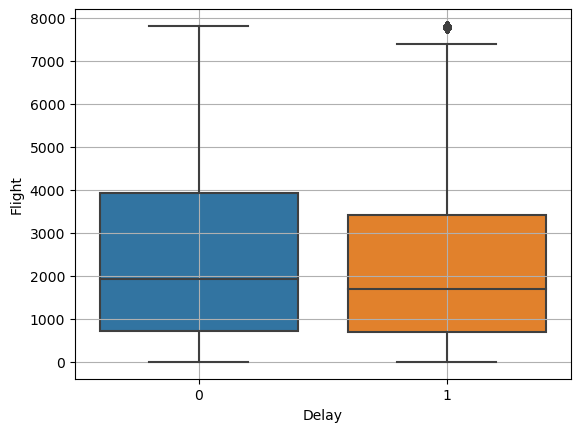

In [14]:
sns.boxplot(data=features,x=target,y='Flight')
plt.grid()

# skewness removal

In [15]:
features[['Flight','Length']]

,Flight,Length
0,269,205
1,1558,222
2,2400,165
3,2466,195
4,108,202
...,...,...
539378,178,326
539379,398,305
539380,609,255
539381,78,313


In [16]:
col=features.select_dtypes(['int','int']).columns

In [17]:
features[col]

,id,Flight,DayOfWeek,Time,Length
0,1,269,3,15,205
1,2,1558,3,15,222
2,3,2400,3,20,165
3,4,2466,3,20,195
4,5,108,3,30,202
...,...,...,...,...,...
539378,539379,178,5,1439,326
539379,539380,398,5,1439,305
539380,539381,609,5,1439,255
539381,539382,78,5,1439,313


In [18]:
from scipy.stats import skew

In [19]:
skew(features['Flight'])

0.8688925118593025

id
1.4081238008286315e-15


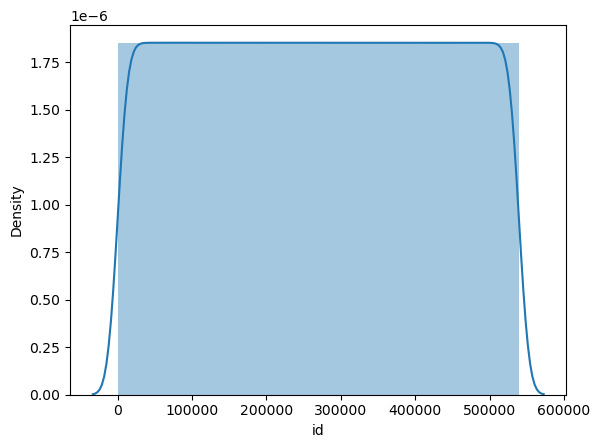

Flight
0.8688925118593025


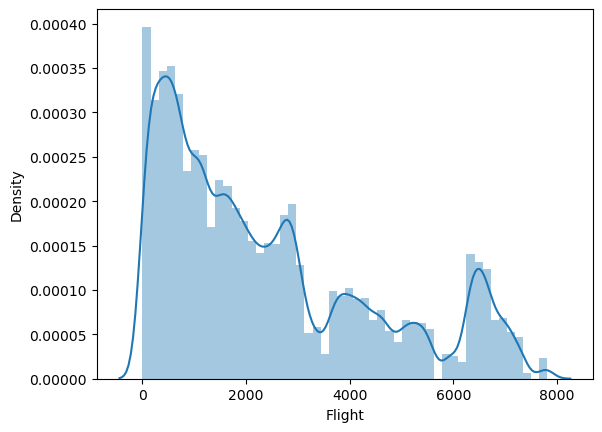

DayOfWeek
0.0622830753098345


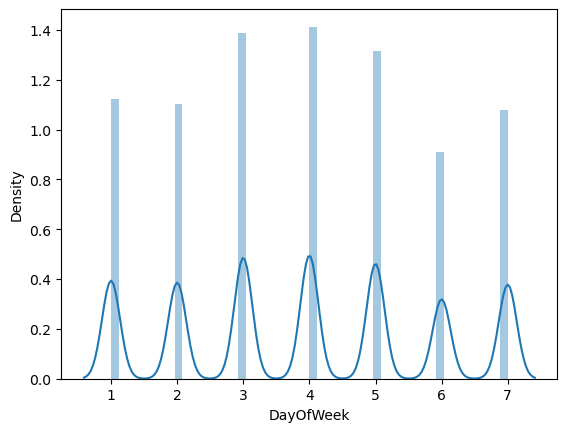

Time
0.07638439752948543


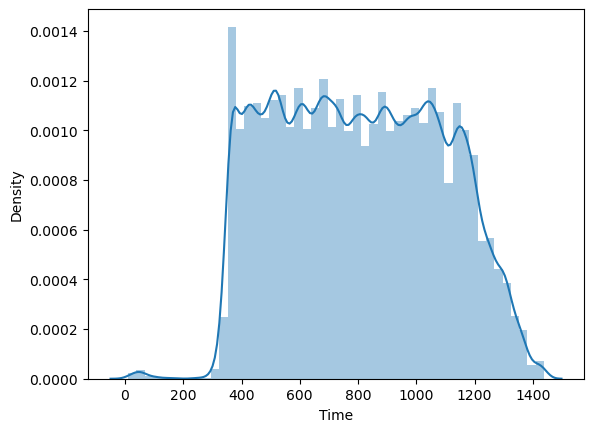

Length
1.4939003720834676


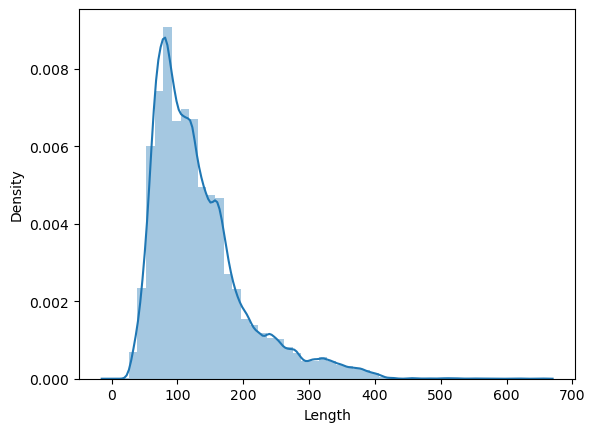

In [20]:
for i in features[col]:
    print(i)
    print(skew(features[i]))
    
    plt.figure()
    sns.distplot(features[i])
    plt.show()

In [21]:
pd.concat([features,target],axis=1).corr().style.background_gradient()

,id,Flight,DayOfWeek,Time,Length,Delay
id,1.000000,-0.006156,-0.055474,0.029156,0.020781,0.139762
Flight,-0.006156,1.000000,0.000416,-0.005750,-0.341481,-0.046175
DayOfWeek,-0.055474,0.000416,1.000000,0.001273,0.013397,-0.026199
Time,0.029156,-0.005750,0.001273,1.000000,-0.020612,0.150454
Length,0.020781,-0.341481,0.013397,-0.020612,1.000000,0.040489
Delay,0.139762,-0.046175,-0.026199,0.150454,0.040489,1.000000


In [22]:
features['Flight']=np.log(features['Flight'])

In [23]:
skew(features['Flight'])

-1.3191872428060272

# Encoding

In [24]:
cat_col = features.select_dtypes(object).columns

In [25]:
cat_col

Index(['Airline'], dtype='object')

In [26]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
features[cat_col] = oe.fit_transform(features[cat_col])

In [27]:
features

,id,Airline,Flight,DayOfWeek,Time,Length
0,1,4.0,5.594711,3,15,205
1,2,14.0,7.351158,3,15,222
2,3,1.0,7.783224,3,20,165
3,4,1.0,7.810353,3,20,195
4,5,2.0,4.682131,3,30,202
...,...,...,...,...,...,...
539378,539379,4.0,5.181784,5,1439,326
539379,539380,8.0,5.986452,5,1439,305
539380,539381,8.0,6.411818,5,1439,255
539381,539382,13.0,4.356709,5,1439,313


# Split the data into training and testing

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size = 0.2,random_state = 1)

In [29]:
xtrain

,id,Airline,Flight,DayOfWeek,Time,Length
306921,306922,12.0,8.765302,6,998,87
76519,76520,9.0,5.913503,7,819,32
147990,147991,13.0,3.610918,4,855,335
162243,162244,4.0,6.068426,5,657,199
2744,2745,5.0,7.624131,3,480,161
...,...,...,...,...,...,...
371403,371404,1.0,7.441320,3,635,155
491263,491264,13.0,6.626718,3,540,131
470924,470925,5.0,7.913521,2,450,224
491755,491756,6.0,8.602637,3,570,78


In [30]:
xtest

,id,Airline,Flight,DayOfWeek,Time,Length
21403,21404,14.0,4.454347,4,525,172
121631,121632,15.0,7.301148,3,400,170
535153,535154,0.0,8.300032,5,950,127
415037,415038,12.0,8.786457,5,1040,133
69899,69900,15.0,4.941642,7,460,140
...,...,...,...,...,...,...
294613,294614,3.0,6.244167,5,1295,174
53777,53778,3.0,6.618739,5,1425,154
234892,234893,15.0,7.610853,2,945,60
521711,521712,17.0,8.883363,4,1167,98


# 1 - Predicting the data using Logistics Regression

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [32]:
## Evaluate the model

In [33]:
from sklearn.metrics import accuracy_score,classification_report
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.5658759513149235
              precision    recall  f1-score   support

           0       0.58      0.75      0.66     59759
           1       0.52      0.34      0.41     48118

    accuracy                           0.57    107877
   macro avg       0.55      0.54      0.53    107877
weighted avg       0.56      0.57      0.55    107877



We have achieved an Average Accuracy of 57% which is not that good. Lets see if we can increase this
accuracy by hyper tuning

# HPT

In [34]:
logreg = LogisticRegression(solver = "liblinear")
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [35]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.5924988644474726
              precision    recall  f1-score   support

           0       0.61      0.75      0.67     59759
           1       0.56      0.39      0.46     48118

    accuracy                           0.59    107877
   macro avg       0.58      0.57      0.57    107877
weighted avg       0.59      0.59      0.58    107877



By using liblinear we get Accuracy of 59%

In [36]:
logreg = LogisticRegression(solver = 'newton-cg')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [37]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.5995717344753747
              precision    recall  f1-score   support

           0       0.61      0.76      0.68     59759
           1       0.57      0.40      0.47     48118

    accuracy                           0.60    107877
   macro avg       0.59      0.58      0.57    107877
weighted avg       0.59      0.60      0.59    107877



By using newton-cg we get Accuracy of 60%

# 3 - Predicting the data using Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [39]:
dt = DecisionTreeClassifier()

In [40]:
def mymodel(model):
 model.fit(xtrain,ytrain)
 ypred = model.predict(xtest)
 print(accuracy_score(ytest,ypred))
 print(classification_report(ytest,ypred))
 
 return model

In [41]:
mymodel(dt)

0.6087395830436516
              precision    recall  f1-score   support

           0       0.65      0.64      0.65     59759
           1       0.56      0.56      0.56     48118

    accuracy                           0.61    107877
   macro avg       0.60      0.60      0.60    107877
weighted avg       0.61      0.61      0.61    107877



DecisionTreeClassifier()

By using Decision Tree we get average accuracy of 61% which is not good but lets check whether we get more
accurcy by hyper tunning

ploting decision tree

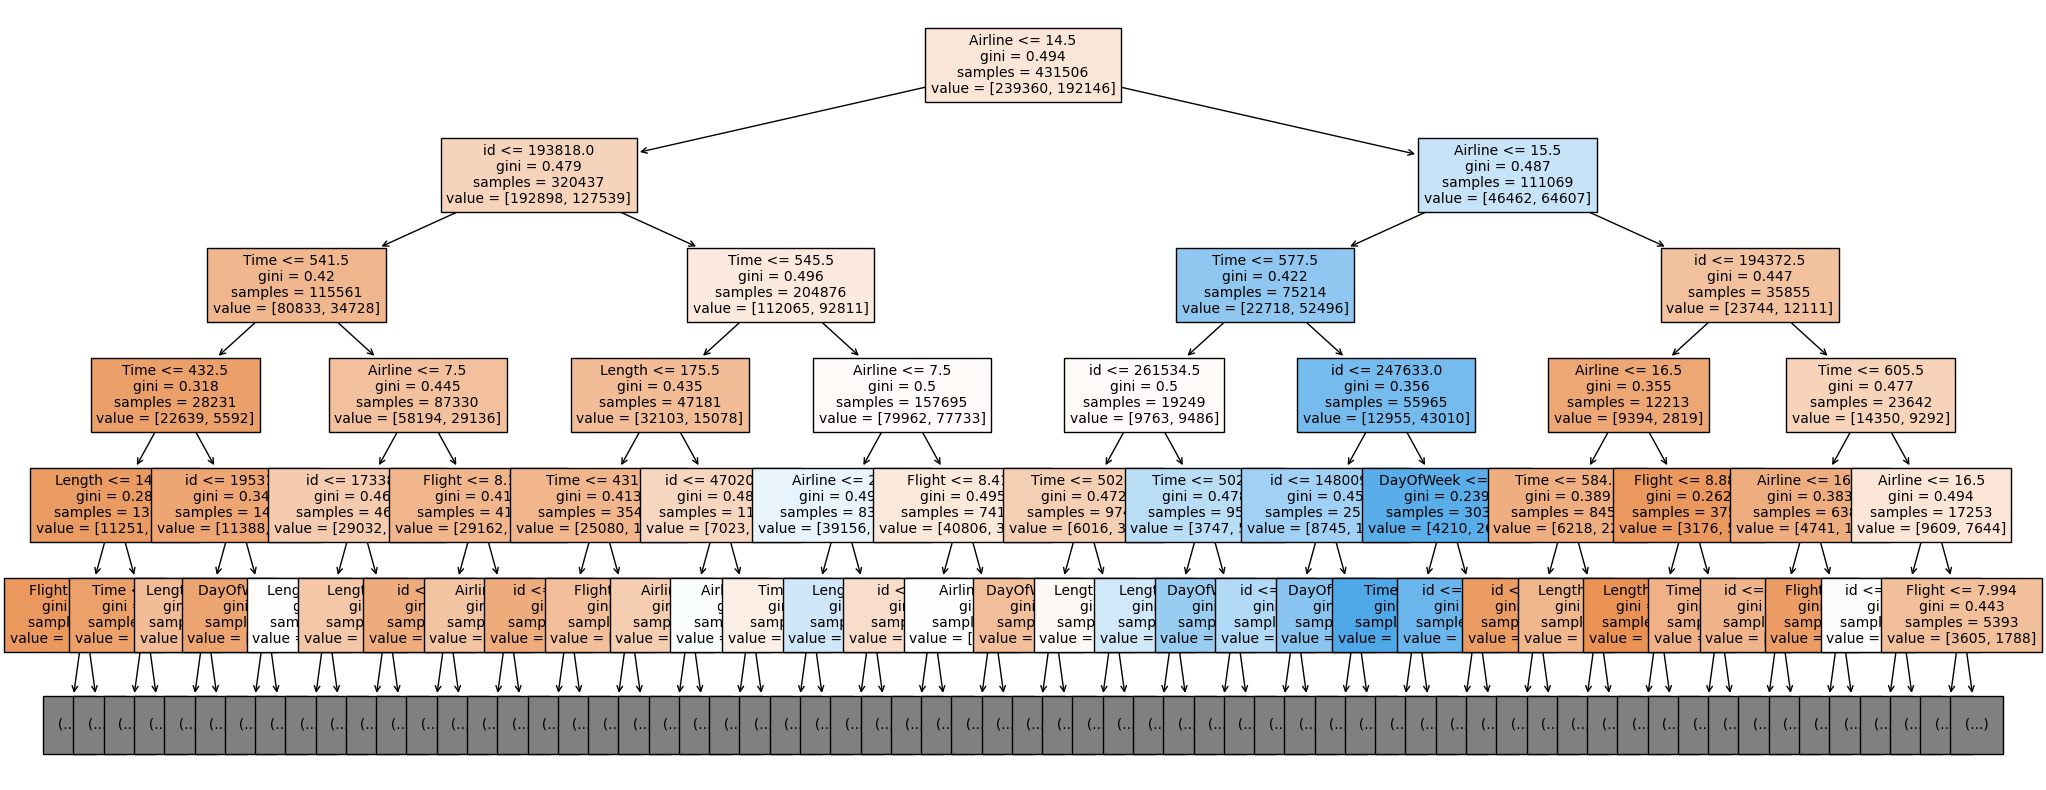

In [42]:
from sklearn import tree
fig,ax=plt.subplots(figsize=(25,10))
chart=tree.plot_tree(dt,max_depth=5,feature_names=features.columns,filled=True,fontsize=10)
plt.savefig('abc.jpg')


checking accuracy of train and test

In [43]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :1.0 
 test score : 0.6087395830436516


train acc is high and test acc is low

low bias high varience

# Hyper Tunning the Decision Tree

# i - max_depth

In [44]:
for i in range(20,35):
 dt1 = DecisionTreeClassifier(max_depth = i)
 dt1.fit(xtrain,ytrain)
 ypred = dt1.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 20 accuracy : 0.6418884470276334
max_depth = 21 accuracy : 0.637420395450374
max_depth = 22 accuracy : 0.6334621837833829
max_depth = 23 accuracy : 0.6284750224793051
max_depth = 24 accuracy : 0.624822714758475
max_depth = 25 accuracy : 0.6215041204334566
max_depth = 26 accuracy : 0.6197335854723435
max_depth = 27 accuracy : 0.6183523828063443
max_depth = 28 accuracy : 0.6163222929818218
max_depth = 29 accuracy : 0.6138101726966824
max_depth = 30 accuracy : 0.6120859868183208
max_depth = 31 accuracy : 0.6116503054404553
max_depth = 32 accuracy : 0.6111960844294891
max_depth = 33 accuracy : 0.6108252917674759
max_depth = 34 accuracy : 0.6100188177275971


In [45]:
dt2 = DecisionTreeClassifier(max_depth = 21)
mymodel(dt2)

0.6369939838890588
              precision    recall  f1-score   support

           0       0.66      0.70      0.68     59759
           1       0.60      0.55      0.58     48118

    accuracy                           0.64    107877
   macro avg       0.63      0.63      0.63    107877
weighted avg       0.63      0.64      0.64    107877



DecisionTreeClassifier(max_depth=21)

By using Decision Tree Max Depth function we achive the accuracy of 64%

In [46]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.8387484762668421 
 test score : 0.6369939838890588


# ii - min_samples_split

In [47]:
for i in range(151,200):
    dt3=DecisionTreeClassifier(min_samples_split=i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    
    ac=accuracy_score(ytest,ypred)
    print(f'min_samples_split{i} accuracy{ac}')

min_samples_split151 accuracy0.6606134764593009
min_samples_split152 accuracy0.6607061746248042
min_samples_split153 accuracy0.6607710633406565
min_samples_split154 accuracy0.6606690953586029
min_samples_split155 accuracy0.6609286502220121
min_samples_split156 accuracy0.6609749993047638
min_samples_split157 accuracy0.6613550617833273
min_samples_split158 accuracy0.6613550617833273
min_samples_split159 accuracy0.6612252843516226
min_samples_split160 accuracy0.6615497279308843
min_samples_split161 accuracy0.6616702355460385
min_samples_split162 accuracy0.6617351242618909
min_samples_split163 accuracy0.6615960770136359
min_samples_split164 accuracy0.6614477599488306
min_samples_split165 accuracy0.6614106806826293
min_samples_split166 accuracy0.6613272523336763
min_samples_split167 accuracy0.6613550617833273
min_samples_split168 accuracy0.661290173067475
min_samples_split169 accuracy0.661484839215032
min_samples_split170 accuracy0.6618649016935955
min_samples_split171 accuracy0.66190198095

In [48]:
dt4 = DecisionTreeClassifier(min_samples_split = 186)
mymodel(dt4)

0.6619205205928975
              precision    recall  f1-score   support

           0       0.68      0.75      0.71     59759
           1       0.64      0.55      0.59     48118

    accuracy                           0.66    107877
   macro avg       0.66      0.65      0.65    107877
weighted avg       0.66      0.66      0.66    107877



DecisionTreeClassifier(min_samples_split=186)

In [49]:
train = dt4.score(xtrain,ytrain)
test = dt4.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.710713176641808 
 test score : 0.6619205205928975


By using Decision Tree Min Sample Split function we achive the accuracy of 66%

# iii - min_samples_leaf

In [50]:
for i in range(50,100):
 dt5 = DecisionTreeClassifier(min_samples_leaf = i)
 dt5.fit(xtrain,ytrain)
 ypred = dt5.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 50 accuracy : 0.6632646439926954
max_depth = 51 accuracy : 0.6639876896836212
max_depth = 52 accuracy : 0.6641638161980774
max_depth = 53 accuracy : 0.664488259777339
max_depth = 54 accuracy : 0.6649517506048556
max_depth = 55 accuracy : 0.6653688923496204
max_depth = 56 accuracy : 0.6654059716158217
max_depth = 57 accuracy : 0.66563771702958
max_depth = 58 accuracy : 0.665554288680627
max_depth = 59 accuracy : 0.665582098130278
max_depth = 60 accuracy : 0.6656469868461303
max_depth = 61 accuracy : 0.6658972718929892
max_depth = 62 accuracy : 0.6655913679468284
max_depth = 63 accuracy : 0.6656469868461303
max_depth = 64 accuracy : 0.6656747962957813
max_depth = 65 accuracy : 0.6653688923496204
max_depth = 66 accuracy : 0.6658323831771369
max_depth = 67 accuracy : 0.6661382871232978
max_depth = 68 accuracy : 0.6662031758391501
max_depth = 69 accuracy : 0.6664905401522104
max_depth = 70 accuracy : 0.6665554288680627
max_depth = 71 accuracy : 0.6666295874004653
max_depth = 72 

In [51]:
dt6 = DecisionTreeClassifier(min_samples_leaf = 50)
mymodel(dt6)

0.6633017232588967
              precision    recall  f1-score   support

           0       0.67      0.76      0.71     59759
           1       0.65      0.54      0.59     48118

    accuracy                           0.66    107877
   macro avg       0.66      0.65      0.65    107877
weighted avg       0.66      0.66      0.66    107877



DecisionTreeClassifier(min_samples_leaf=50)

In [52]:
train = dt6.score(xtrain,ytrain)
test = dt6.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.706854597618573 
 test score : 0.6633017232588967


By using Decision Tree min_samples_leaf function we achive the accuracy of 66%

# 4 - Predicting the data using Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
ypred = rc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72     59759
           1       0.65      0.57      0.61     48118

    accuracy                           0.67    107877
   macro avg       0.67      0.66      0.66    107877
weighted avg       0.67      0.67      0.67    107877



By using Random Forest we get 67% of accuracy.

# 5. Predicting the data using Boosting

# i - Adaboost Classifier

In [54]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred = ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.70     59759
           1       0.63      0.54      0.58     48118

    accuracy                           0.65    107877
   macro avg       0.65      0.64      0.64    107877
weighted avg       0.65      0.65      0.65    107877



By using AdaBoost Classifier we get 65% of accuracy

# ii - Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72     59759
           1       0.66      0.49      0.57     48118

    accuracy                           0.66    107877
   macro avg       0.66      0.65      0.64    107877
weighted avg       0.66      0.66      0.65    107877



By using Gradient Boosting algorithm we get 66% of accuracy

# iii - XG Boosting

In [56]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73     59759
           1       0.68      0.54      0.60     48118

    accuracy                           0.68    107877
   macro avg       0.68      0.67      0.67    107877
weighted avg       0.68      0.68      0.67    107877



By using XG Boost algorithm we get 68% of accuracy

# 6. Predicting the data using Encemble Learning

# i - Bagging

In [58]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.57      0.79      0.66     59759
           1       0.50      0.26      0.35     48118

    accuracy                           0.55    107877
   macro avg       0.54      0.53      0.50    107877
weighted avg       0.54      0.55      0.52    107877



By using Bagging Classifier on Logostic Regression we get 55% of accuracy which is not good for prediction

In [59]:
bg = BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71     59759
           1       0.63      0.52      0.57     48118

    accuracy                           0.65    107877
   macro avg       0.65      0.64      0.64    107877
weighted avg       0.65      0.65      0.65    107877



By using Bagging Classifier on Decision Tree we get 65% of accuracy.`

In [60]:
models =[]
models.append(("lr",LogisticRegression()))
models.append(("dt",DecisionTreeClassifier()))

In [61]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models) # estimators --> model name
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.58      0.89      0.71     59759
           1       0.61      0.20      0.31     48118

    accuracy                           0.59    107877
   macro avg       0.60      0.55      0.51    107877
weighted avg       0.60      0.59      0.53    107877



In [62]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models,voting='soft') # estimators --> model na
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64     59759
           1       0.56      0.57      0.56     48118

    accuracy                           0.61    107877
   macro avg       0.60      0.60      0.60    107877
weighted avg       0.61      0.61      0.61    107877



By using Voting Classifier we get 59% And 61% of of accuracy